# Import cleaned data (use to skip data processing)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
import seaborn as sns


In [4]:
df = pd.read_csv("../data/noHTML/df_story_noHTML_clean.csv", low_memory = False)

False

In [2]:
df.head()
print(df.columns)

NameError: name 'df' is not defined

# Check NA

In [12]:
len(df[-df['PostID'].isna()])

6827935

# Data preprocessing

## Import data

In [7]:
raw_data = pd.read_csv("df_archive_v2.csv", low_memory = False)

In [3]:
print(raw_data.columns)

NameError: name 'raw_data' is not defined

In [ ]:
print(raw_data.columns)
print(len(raw_data))
display(raw_data.head())

## matplotlib settings

In [6]:
plt.rcParams['figure.figsize'] = [8, 5]

## Clean data

## Remove bad data

In [20]:
# Remove bad rows
from numpy import nan

df = raw_data
print(len(raw_data))
# Bug from crawler which rewrites csv columns in existing csv when re-running the crawler
df = df[raw_data.StoryURL != 'StoryURL']


# Remove posts with NaN reading time (this removes response posts and keeps only articles)
# df = df.loc[raw_data['ReadingTime'].notnull()]

# Replace posts with NaN reading time with 0
df['ReadingTime'] = df['ReadingTime'].fillna(0)

8845819


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Convert ReadingTime and ClapCount_Card to number

In [6]:

df['ReadingTime'] = df['ReadingTime'].replace(" min read", "", regex=True).astype(int)
sub = df
# # Convert clap approximation on archive into number (10.3K->10,300, etc)
sub['ClapCount_Card'] = sub['ClapCount_Card'].str.replace(" claps", "")
sub['ClapCount_Card'] = sub['ClapCount_Card'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
sub['ClapCount_Card'] = sub['ClapCount_Card'].astype(int)


KeyboardInterrupt: 

In [8]:
sub.to_csv("df_archive_v2_cleaned.csv", index=False)

# Analysis

### Code for limiting dataframe

In [9]:
sub = df

# Filter out tags less than the median number of articles
medianLength = sub.groupby(['TagSource']).size().median()

medianLength = 0

print("Median number of articles per tag is: ", medianLength)
sub = sub.groupby(['TagSource']).filter(lambda x: len(x) >= medianLength)


Median number of articles per tag is:  0


##  All articles

### What is the estimated reading time of articles?

(0, 20)

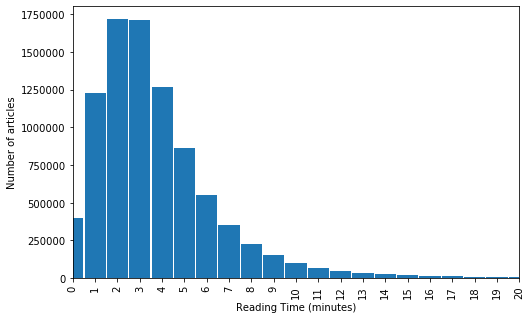

In [10]:
fig = plt.figure(figsize=(8,5))
ax = sub['ReadingTime'].value_counts().sort_index().plot.bar(width=0.95)
plt.xlabel("Reading Time (minutes)")
plt.ylabel("Number of articles")
ax.set_xlim((0,20))
# plt.xticks(range(0,20))



# plt.xticks(np.arange(min(sub['ReadingTime']), 20, 1.0))


---
The majority of articles are between 1-4 minutes in reading time length. The frequency of articles drops off sharply after 5 minutes.

### How many claps does an article get?

### Relationship between claps and reading time

515


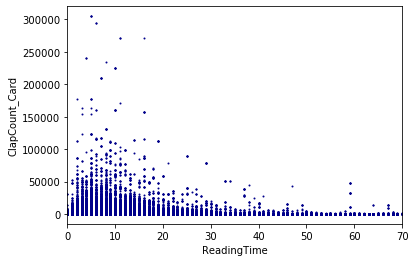

In [12]:
print(sub['ReadingTime'].max())


temp = sub[sub['ClapCount_Card'] < 500000]


# x1 = sub.groupby("ReadingTime")['ClapCount_Card'].median().sort_index().plot()
x1 = temp.plot.scatter(x='ReadingTime',
                      y='ClapCount_Card',
                      c='DarkBlue', s=1)
x1.set_xlim((0,70))


# Bin method

# temp = sub
# temp = temp[temp['ReadingTime'] < 60]
# out = pd.cut(temp['ReadingTime'], bins=range(0,60,3))
# temp.groupby(out)['ClapCount_Card'].agg(['median']).plot(kind='bar')

del temp

## Tag Dimension

### Code for showing tag

In [ ]:
# This user made an article with 1M claps
# article = df[df['TagSource'] == 'cryptocurrency']
# display(article)

### Count articles per tag

20


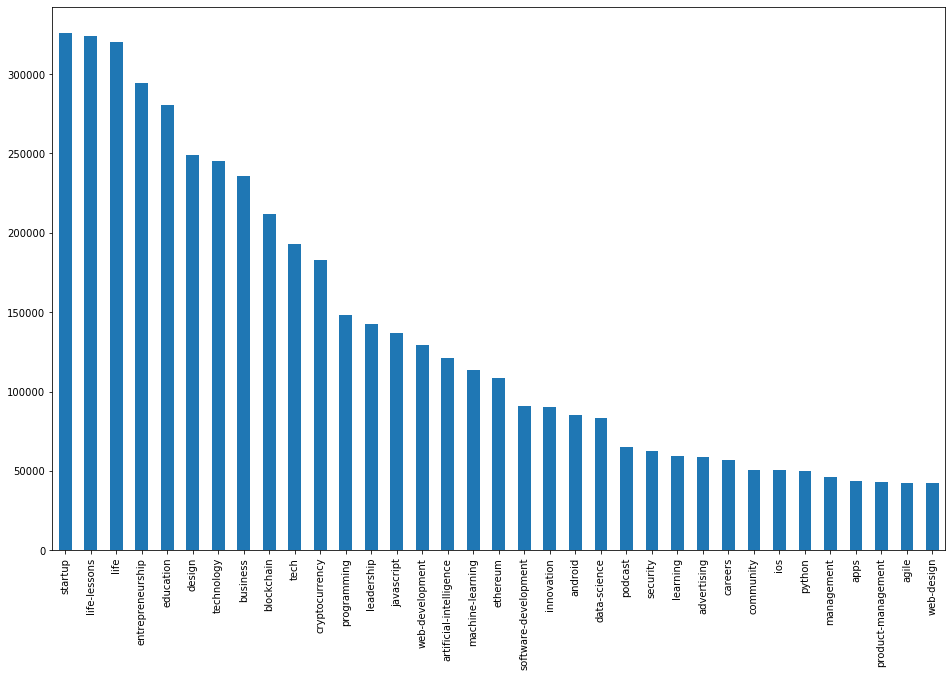

In [688]:
tagArticles = df.TagSource.value_counts()[0:35].plot(kind='bar')
tagArticles = df.TagSource.value_counts()
print(tagArticles.get('python3'))

The top tags, 'startup' and 'technology' show that a large amount of Medium articles pertain to entrepreneurship/innovation and technologies.

Tags become more specific in their topic as their article size decreases. Note the popularity of "blockchain" and cryptocurrency-related tags (ethereum, cryptocurrency)

### Claps by tag

Median number of articles per tag is:  25.0


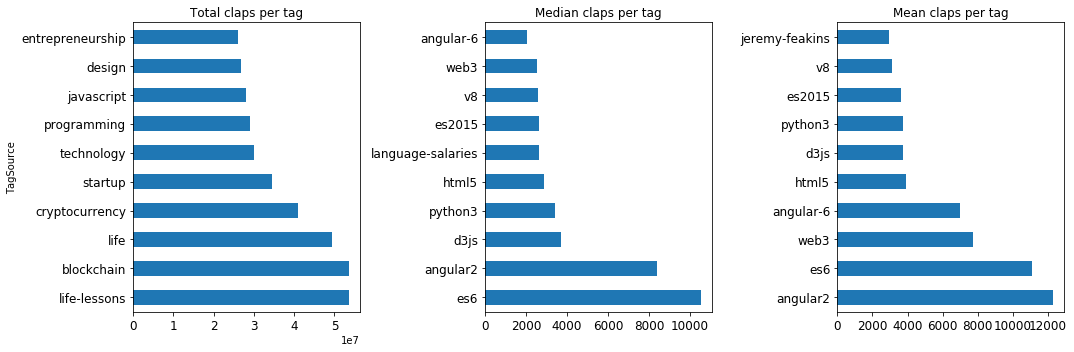

In [687]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sub = df



# Filter out tags less than the median number of articles
medianLength = sub.groupby(['TagSource']).size().median()


print("Median number of articles per tag is: ", medianLength)
sub = sub.groupby(['TagSource']).filter(lambda x: len(x) >= 0*medianLength)


# # Total claps per tag
ax1 = sub.groupby("TagSource")['ClapCount_Card'].sum().sort_values(ascending=False)[0:10].plot(kind="barh",fontsize=12, ax=axs[0], title="Total claps per tag")
# Median claps per tag
ax2 = sub.groupby("TagSource")['ClapCount_Card'].median().sort_values(ascending=False)[0:10].plot(kind="barh", fontsize=12, ax=axs[1], title="Median claps per tag")
ax2.set_ylabel('')

# Mean claps per tag
ax3 = sub.groupby("TagSource")['ClapCount_Card'].mean().sort_values(ascending=False)[0:10].plot(kind="barh", fontsize=12, ax=axs[2], title="Mean claps per tag")
ax3.set_ylabel('')

plt.tight_layout()

# tagClaps = sub.groupby("TagSource")['ClapCount_Card'].median()

# print(tagClaps['artificial-intelligence'])

        TagSource   count    size       sum  ratio_sum_count
0    life-lessons  324212  324212  53611787       165.360280
1      blockchain  212154  212154  53511314       252.228636
2            life  320046  320046  49416710       154.405023
3  cryptocurrency  183046  183046  40928206       223.595195
4         startup  326125  326125  34560940       105.974519


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Text(0, 0.5, 'Clap sum')

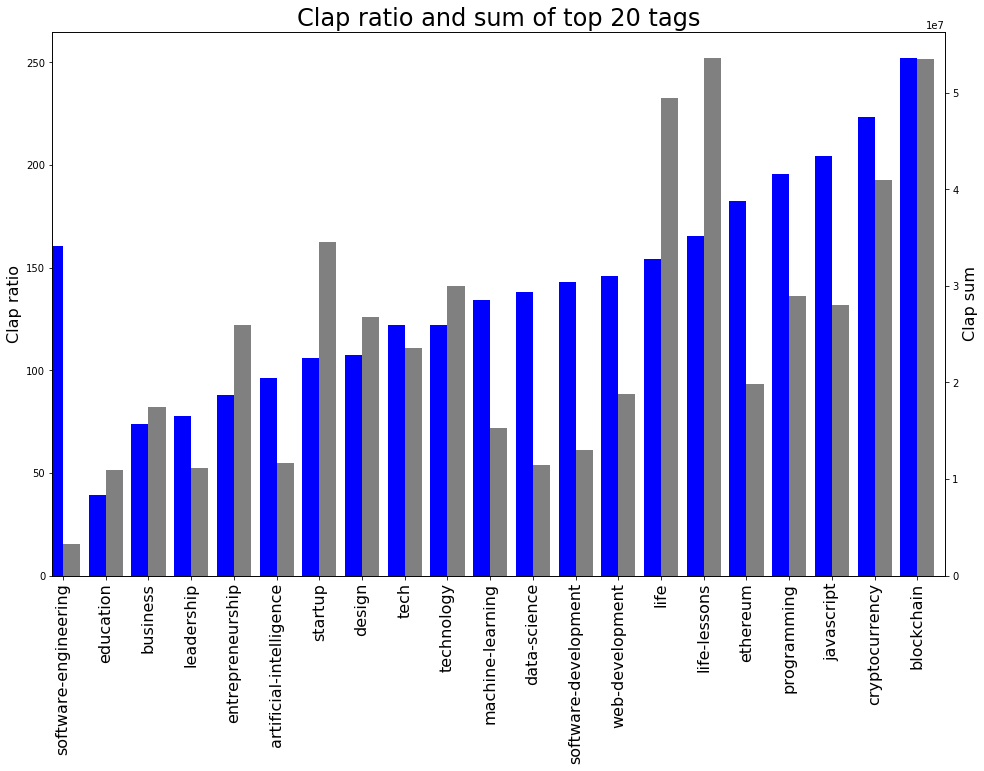

In [689]:

fig = plt.figure(figsize=(16,10))


topClaps = df

topClaps = topClaps.groupby('TagSource')['ClapCount_Card'].agg(['count', 'size', 'sum']).sort_values(by="sum",ascending=False).reset_index()

topClaps['ratio_sum_count'] = topClaps['sum']/topClaps['size']

soft_eng_row = topClaps[topClaps['TagSource'] == 'software-engineering']

print(topClaps.head())


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
topClaps = topClaps[['TagSource', 'ratio_sum_count', 'sum']].iloc[0:20].sort_values(by='ratio_sum_count')

topClaps = pd.concat([soft_eng_row, topClaps]).reset_index(drop = True)


topClaps['ratio_sum_count'].plot(kind='bar', color='blue', ax=ax, width=width, position=1)
topClaps['sum'].plot(kind='bar', color='gray', ax=ax2, width=width, position=0)
ax.set_xticklabels(topClaps['TagSource'],fontsize=16)
ax.set_title("Clap ratio and sum of top 20 tags", fontsize=24)
ax.set_ylabel('Clap ratio', fontsize=16)
ax2.set_ylabel('Clap sum',fontsize=16)
# ax.set_title("Ratio of total claps to total articles for the top 20 tags by clap sum", fontsize=16)



# sub.groupby(['TagSource']).apply(lambda x: x['ClapCount_Card'].sum()/len(x)).sort_values()[-10:-1].plot(kind="barh",fontsize=12, ax=axs[0], title="Normalized clap count per tag")

# ax = x.sort_values(ascending=False)[0:10].plot(kind='barh', fontsize=12)
# ax.set_title("Ratio of total claps to total articles per tag (>1250 articles)", fontsize=20)
# ax.set_ylabel("Tag", fontsize=20)
# plt.setp(ax.get_yticklabels(), fontsize=20)


# # Make some labels.

# plt.tight_layout()

TagSource
0800-098-8354          0.0
0chain               676.0
1-star-reviews         0.5
100-days-of-react      0.0
10000-hour-rule      364.2
dtype: float64


### Distribution of claps for a tag

In [5]:
sub = df
# readingTimeTag = sub[sub['TagSource'].isin(['machine-learning', 'startup', 'angular-6', 'web-development',  'hackerrank'])]
readingTimeTag = sub[sub['TagSource'].isin(['machine-learning', 'startup', 'angular-6', 'web-development', 'hackerrank'])]

# readingTimeTag = readingTimeTag[readingTimeTag['ClapCount_Card']]
b = sns.boxplot('TagSource','ClapCount_Card', data=readingTimeTag)

# b.set_yscale('log')
b.tick_params(labelsize=15)
b.set_xlabel("")
b.set_ylabel("Number of claps per article (log)", fontsize=15)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

### Reading time across tags

In [259]:
readingTimeTag = sub.groupby('TagSource')['ReadingTime'].agg(['mean', 'median', 'sum', 'size']).sort_values(by="mean",ascending=False).reset_index()

display(HTML(readingTimeTag.head(5).to_html()))

,TagSource,mean,median,sum,size
0,gpt-2,12.70,9.0,127,10
1,esoteric-language,11.50,6.0,69,6
2,voicecode,10.00,10.0,30,3
3,cs50,9.90,7.0,99,10
4,core-async,9.75,6.5,39,4


### Violin plot of reading time by tag

Text(0, 0.5, 'Reading Time')

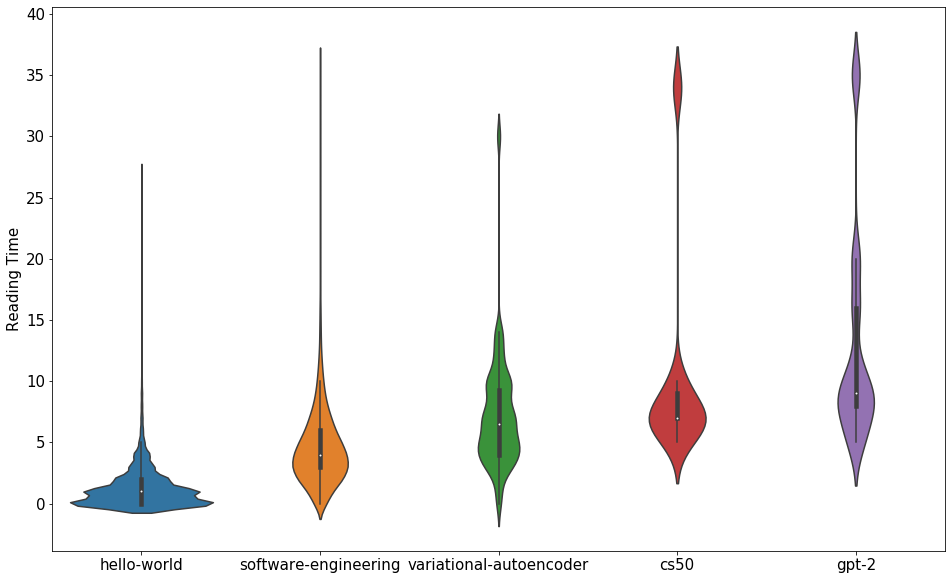

In [566]:
sub = df
# readingTimeTag = sub[sub['TagSource'].isin(['machine-learning', 'startup', 'angular-6', 'web-development',  'hackerrank'])]
readingTimeTag = sub[sub['TagSource'].isin(['hello-world', 'software-engineering', 'variational-autoencoder', 'cs50', 'gpt-2'])]

readingTimeTag = readingTimeTag[readingTimeTag['ReadingTime'] < 37]
# b = sns.violinplot('TagSource','ReadingTime', data=readingTimeTag, bw=0.2, fontsize=22)
b = sns.violinplot('TagSource','ReadingTime', data=readingTimeTag, bw=0.2, order=['hello-world', 'software-engineering', 'variational-autoencoder', 'cs50', 'gpt-2' ])

b.tick_params(labelsize=15)
b.set_xlabel("")
b.set_ylabel("Reading Time", fontsize=15)

# ax = temp['mean'].plot.bar(width=0.95)
# ax.set_xticklabels(readingTimeTag['TagSource'])

---


The average (mean) reading time of articles across tags varies greatly. Tags such as "shell" and "commands" contain a majority of short articles (1-2 minutes), which are about quick tutorials or a list of code commands. In contrast, the distribution of more general tags such as "programming" and "softare-engineering" resemble ones of article-wide reading time distribution, with most articles within the normal 3-5 minutes of reading time. It was noticed that state-of-the-art machine learning subtopics such as "variational-autoencoder" and "gpt-2" contain articles with the highest reading times up to 30-40 minutes in length, which is explained by the intrinsic complexity of the topics themselves.  



### Which tags have the highest proportion of being in a publication?

### Which tags have the highest proportion of paywalls?

### Growth/decline of tags over time

In [415]:
df = pd.read_csv("df_archive_v2_cleaned.csv")

C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


    ClapCount_Card  ClapCount_Story                      Company  \
11             214              NaN              Level Up Coding   
12             165              NaN  JavaScript in Plain English   
13               0              NaN                          NaN   
14               6              NaN                          NaN   
15               0              NaN                          NaN   

                                           CompanyURL  PostID  \
11  https://levelup.gitconnected.com?source=tag_ar...     NaN   
12  https://medium.com/javascript-in-plain-english...     NaN   
13                                                NaN     NaN   
14                                                NaN     NaN   
15                                                NaN     NaN   

             PublishedDate  ReadingTime ResponseNum_Card  ResponseNum_Story  \
11 2019-12-31 08:06:01.563            6                0                NaN   
12 2019-12-31 08:06:01.318            6   

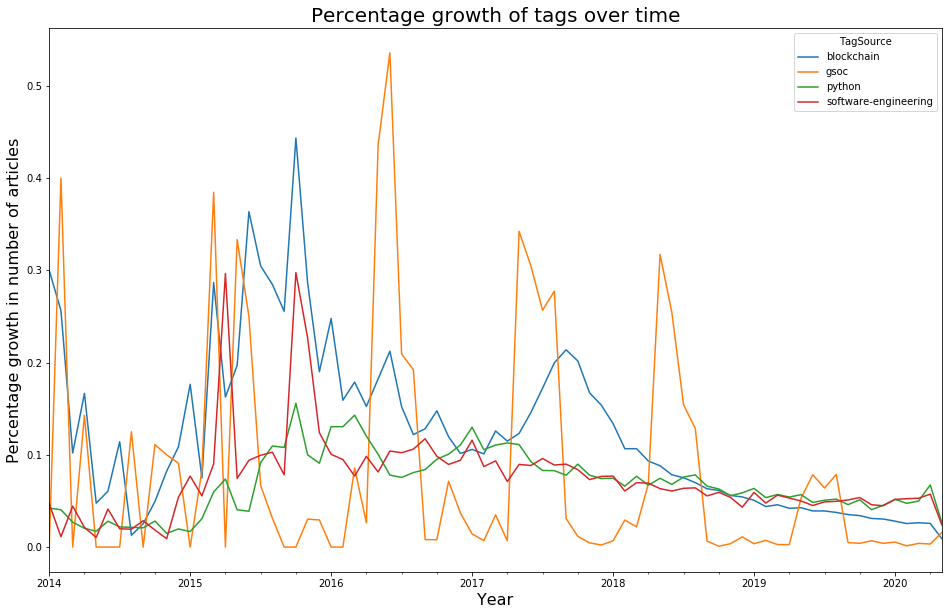

<Figure size 576x360 with 0 Axes>

<class 'pandas.core.frame.DataFrame'>


In [550]:
plt.rcParams['figure.figsize'] = [16, 10]
fig, ax = plt.subplots()

from datetime import datetime
# print(df['ReadingTime'].head())
# sub['PublishedDate'] = sub['PublishedDate'].astype("datetime64")

# subdf = df[df['TagSource'].isin(['software-engineering', 'machine-learning', 'blockchain', 'programming', 'web-development', 'python'])]
subdf = df[df['TagSource'].isin(['python', 'software-engineering', 'gsoc', 'blockchain'])]
# subdf = df[df['TagSource'] == 'machine-learning']
# subdf['PublishedDate'] = pd.to_datetime(subdf['PublishedDate'])
subdf['PublishedDate'] = subdf['PublishedDate'].astype('datetime64[ns]')
# subdf['PublishedDate'] = subdf.PublishedDate.dt.strftime('%Y-%m')

# subdf = subdf[subdf['TagSource'] != 'life']
# subdf = subdf[subdf['TagSource'] != 'life-lessons']
# subdf = subdf[subdf['TagSource'] != 'business']
# subdf = subdf[subdf['TagSource'] != 'design']
# subdf = subdf[subdf['TagSource'] != 'education']
# subdf = subdf[subdf['TagSource'] != 'leadership']


# subdf = subdf[subdf['TagSource'].isin(['software-engineering', 'machine-learning', 'blockchain', 'programming', 'web-development', 'python'])]
subdf['count'] = 1
# display(HTML(subdf.head().to_html()))


print(subdf.head())

print(type(subdf.PublishedDate.iloc[0]))
# subdf = subdf[subdf['TagSource'].isin(['software-engineering'])]
# Filter out tags less than the median number of articles
# medianLength = subdf.groupby(['TagSource']).size().median()


# print("Median number of articles per tag is: ", medianLength)
# subdf = subdf.groupby(['TagSource']).filter(lambda x: len(x) >= medianLength)



# fig, ax = plt.subplots(figsize=(15,7))
# use unstack()


# df['PublishedDate'].hist()
# pivot = pd.pivot_table(subdf, values="count", index=pd.Grouper(key='PublishedDate',freq='M'), columns=["TagSource"], aggfunc='size')
pivot = subdf.set_index('PublishedDate').groupby('TagSource')["count"].resample("M").sum().reset_index()
subdf.set_index('PublishedDate', inplace=True)
pivot['cumsum'] = pivot.groupby('TagSource')['count'].transform(pd.Series.cumsum)
pivot['pct_change'] = pivot.groupby('TagSource')['cumsum'].transform(pd.Series.pct_change)
print(pivot.tail())

pivot = pivot[pivot['PublishedDate'] > pd.Timestamp(2014,1,1)]

fig = plt.figure(figsize=(8,5))

pivot.pivot(index='PublishedDate', columns='TagSource', values='pct_change').plot(kind='line', ax=ax) ################ Change values to 'cumsum' or 'pct_change'
print(type(pivot))
print(len(pivot))
print(pivot.columns)

ax.set_title("Percentage growth of tags over time",fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Percentage growth in number of articles", fontsize=16)

plt.show()

# x = pivot.groupby(['TagSource', 'PublishedDate'])
# print(x.head())
# pivot = subdf.groupby(['PublishedDate','TagSource']).sum().unstack()


# pivot.plot()
# pivot.groupby("TagSource").plot()
print(type(pivot))
# pivot = subdf.groupby(['TagSource', pd.Grouper(freq='3M', key='PublishedDate', closed='left')])['count'].sum()
# display(pivot)
# display(HTML(pivot.to_html()))

# ax = pivot.cumsum().plot()
# ax = pivot.cumsum().plot()
# ax = pivot.cumsum().plot(fontsize='12')
# pivot_data = pivot.cumsum().pct_change().plot(kind='bar',use_index=True)
# display(pivot.cumsum().pct_change())
# display(pivot_data.tail(10))
# pivot_data.plot(kind='bar')
# leg = plt.legend()

# # display(pivot.cumsum().pct_change().tail())
# for i in leg.legendHandles:
#     i.set_linewidth(5)
# plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
# ax.set_xlabel("Year", fontsize=20)
# ax.set_ylabel("Number of articles", fontsize=20)
# ax.set_xlim([pd.to_datetime('2014-01-28 23:50:00'), pd.to_datetime('2020-01-29 00:10:00')])

# pivot.head(10)

## Publication Dimension

### Filter out publications with less than the median number of articles

In [323]:

subPub = sub

# Filter out publications with less than the median number of articles
medianLength = subPub.groupby(['Company']).size().median()

# medianLength = 0

print("Median number of articles per tag is: ", medianLength)
subPub = subPub.groupby(['Company']).filter(lambda x: len(x) > medianLength)


Median number of articles per tag is:  3.0


### Largest publications by total claps

61117


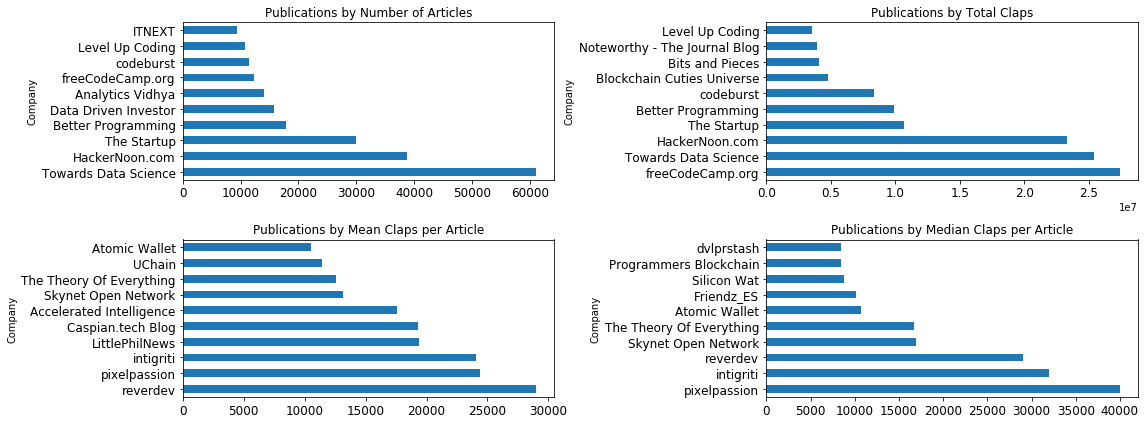

In [324]:
fig, axs = plt.subplots(2,2, figsize=(16, 6))


# Largest publications by article
pubs = subPub.groupby("Company").size().sort_values(ascending=False)[0:10].plot(kind="barh", fontsize=12, ax=axs[0][0], title="Publications by Number of Articles")


# Largest publications by clapcount (total)
pubs = subPub.groupby("Company")['ClapCount_Card'].sum().sort_values(ascending=False)[0:10].plot(kind="barh", fontsize=12, ax=axs[0][1], title="Publications by Total Claps")

# Largest publications by clapcount (mean)
pubs = subPub.groupby("Company")['ClapCount_Card'].mean().sort_values(ascending=False)[0:10].plot(kind="barh", fontsize=12, ax=axs[1][0], title="Publications by Mean Claps per Article")


# Largest publications by clapcount (median)
pubs = subPub.groupby("Company")['ClapCount_Card'].median().sort_values(ascending=False)[0:10].plot(kind="barh", fontsize=12, ax=axs[1][1], title="Publications by Median Claps per Article")


plt.tight_layout()

print(sub.groupby("Company").size().sort_values().get("Towards Data Science"))

---
The largest publications by number of articles correlate with the number of total claps. However, they do not correlate with the highest median/mean number of claps. The publications with the highest mean/median number of claps are small ones with much fewer articles. 

### Violin plot of the largest publications and claps

Text(0, 0.5, 'Reading Time')

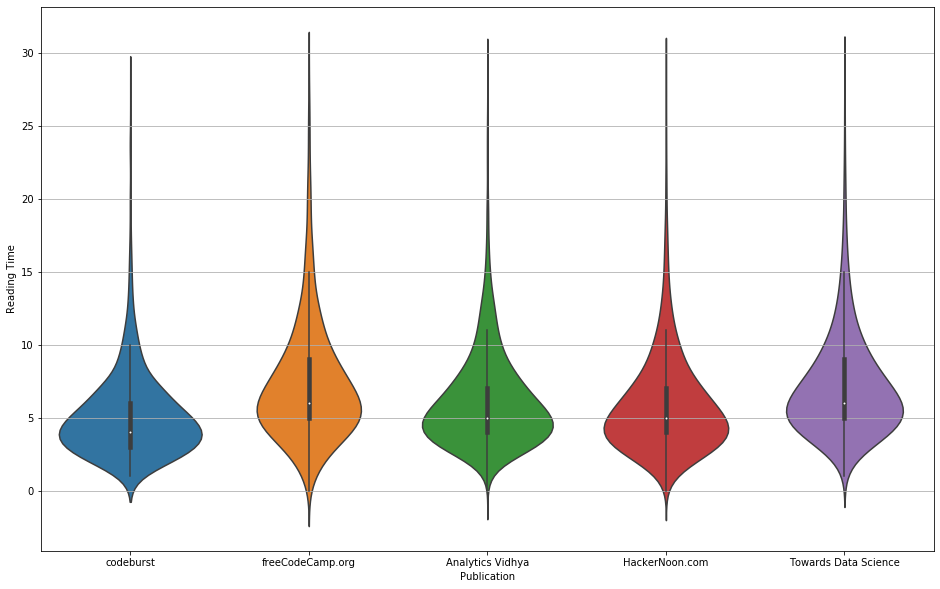

In [173]:
fig, axes = plt.subplots()

largestPublications = sub[sub['Company'].isin(['Towards Data Science', 'Analytics Vidhya', 'freeCodeCamp.org', 'codeburst',  'HackerNoon.com'])]

# largestPublications = largestPublications[largestPublications['ClapCount_Card'] < 1000]
largestPublications = largestPublications[largestPublications['ReadingTime'] < 30]
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('Company','ReadingTime', data=largestPublications, bw=0.3, ax = axes, order=['codeburst',  'freeCodeCamp.org', 'Analytics Vidhya', 'HackerNoon.com', 'Towards Data Science'])
# axes.set_title('Publication clap KDE')

axes.yaxis.grid(True)
axes.set_xlabel('Publication')
axes.set_ylabel('Reading Time')


---
Violin plots of the distribution of reading time across major publications. 

Towards Data Science and freeCodeCamp.org have articles skewed towards higher reading times, suggesting that they have a higher requirement for articles to be more detailed and lengthier (5+ minutes). In contrast, most articles in "codeburst", "Analytics Vidhya", and 'HackerNoon.com" publications tend to be shorter in reading time (3-4 minutes).


### How many authors write for a publication?

In [288]:
# Number of authors that have written at least one article for a publication

authorsListUnique = sub['User'].unique()

sub = df

authorPub = sub.groupby('User')['Company'].agg(['count', 'size', 'nunique', 'unique']).sort_values(by="count",ascending=False).reset_index()

# Percentage of articles that are in a publication
authorPub['mean'] = authorPub['count']/authorPub['size']
authorPub["unique"] = authorPub["unique"].apply(lambda x: [i for i in x if str(i) != "nan"])

# display(type(authorPub))
# display(HTML(authorPub.head(10).to_html()))

Proportion of all users' total articles to publication articles 0.24454564959843678 +/- 0.0010520856768461428
Proportion of authors who have at least one publication article, articles to publication articles 0.8070952706714312 +/- 0.0013587428213851505
Percentage of authors who have written at least one publication article:  0.3029947745759886
Percentage of authors who have had more than 75% of their articles written for a publication:  0.20728756859921033
Percentage of authors who have at least one publication article who also have had more than 75% of their articles written for a publication:  0.6841291863507841


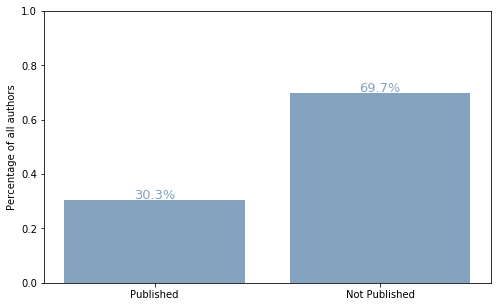

In [347]:

plt.rcParams['figure.figsize'] = [8, 5]


# Average proportion of a user's total articles being in publication 
x = authorPub['mean'].mean(axis=0)
# authorPub['mean'].hist(bins=10)
y = authorPub['mean'].sem(axis=0)

xmin = x-y*1.96
xmax = x+y*1.96

print("Proportion of all users' total articles to publication articles", x, '+/-', (xmax-xmin)/2)

authorPub_at_least_once = authorPub[authorPub['nunique']>0]
x = authorPub_at_least_once['mean'].mean(axis=0)
y = authorPub_at_least_once['mean'].sem(axis=0)

xmin = x-y*1.96
xmax = x+y*1.96

print("Proportion of authors who have at least one publication article, articles to publication articles", x, '+/-', (xmax-xmin)/2)

# Number of authors who have written at least one article for a publication
x = len(authorPub_at_least_once)/len(authorPub)
y = 1-len(authorPub_at_least_once)/len(authorPub)
s = [x,y]
print("Percentage of authors who have written at least one publication article: ", x)
plt.bar(['Published', 'Not Published'], s, color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel("Percentage of all authors")
plt.ylim((0,1))
label = range(0,1)
for i, v in enumerate(s):
    plt.text(i,  
              s[i]+0.02, 
              '{:.1%}'.format(s[i]), 
              fontsize=13, 
              color=(0.2, 0.4, 0.6, 0.6),
             va='center',  ha='center')

x = len(authorPub[authorPub['mean']>0.75])/len(authorPub)
print("Percentage of authors who have had more than 75% of their articles written for a publication: ", x)

x = len(authorPub[authorPub['mean']>0.75])/len(authorPub[authorPub['nunique']>0])
print("Percentage of authors who have at least one publication article who also have had more than 75% of their articles written for a publication: ", x)



- 31.6% of all writers have written an article in at least one publication. 
- Among all writers, the average (mean) proportion of publication articles to total articles per user is 25.6%.
- Among all writers, 21.9% of writers have more than 75% of their total articles in a publication.
- Of the 31.6% who have written at least one publication article, the average proportion of publication articles to total articles increases dramatically to 81.3%.
- Of the 31.6% who have written at least one publication article, 69.4% have more than 75% of their total articles in a publication.
---
<font size="4"> Interpretation: A substantial portion of writers on Medium have written at least one publication article, implying that the Publication feature is well-used. Publication writers tend to have most of their articles in publications. Writers who have never published in a publication tend to write articles that are not in publications.</font>


Text(0.5, 0, 'Proportion of publication articles to total articles per author')

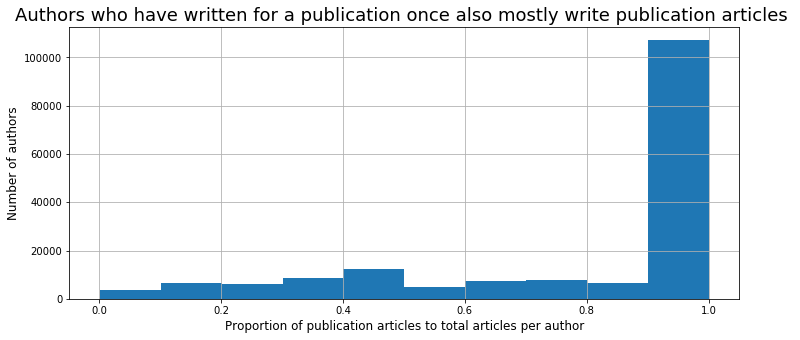

In [356]:
ax = plt.figure(figsize=(12,5))
ax = authorPub_at_least_once['mean'].hist(bins=10)
ax.set_title("Authors who have written for a publication once also mostly write publication articles ",  fontsize='18')
ax.set_ylabel("Number of authors",  fontsize='12')
ax.set_xlabel("Proportion of publication articles to total articles per author", fontsize='12')

### How many authors does a publication have?

This is useful for determining genuine publications, as some "publications" just refer to a singular organization that does not accept articles from other users.

### What is the tag diversity of publications?

## User Dimension

### Code for viewing a profile

In [150]:
display(HTML(sub[sub['User'] == "Jackson Cunningham"].to_html()))

,ClapCount_Card,ClapCount_Story,Company,CompanyURL,PostID,PublishedDate,ReadingTime,ResponseNum,StoryHTML,StoryIndex,StoryTitle,StoryURL,StoryURL_Story,Tag1,Tag2,Tag3,Tag4,Tag5,TagSource,User,UserURL,VoterCount,isPaywall
1094547,388,NaN,NaN,NaN,NaN,2020-02-11T14:01:01.673Z,7 min read,2,NaN,456718,Extinction: Amazon and the End of the American Entrepreneur,https://medium.com/@jacksoncunningham/extinction-amazon-and-the-end-of-the-american-entrepreneur-8c2645f38976?source=tag_archive---------5-----------------------#--responses,NaN,NaN,NaN,NaN,NaN,NaN,technology,Jackson Cunningham,https://medium.com/@jacksoncunningham,NaN,True
1267091,305000,NaN,NaN,NaN,NaN,2018-07-13T11:46:00.956Z,5 min read,1,NaN,629262,Digital Exile: How I Got Banned for Life from AirBnB,https://medium.com/@jacksoncunningham/digital-exile-how-i-got-banned-for-life-from-airbnb-615434c6eeba?source=tag_archive---------0-----------------------#--responses,NaN,NaN,NaN,NaN,NaN,NaN,technology,Jackson Cunningham,https://medium.com/@jacksoncunningham,NaN,True


### Who are the most successful authors?

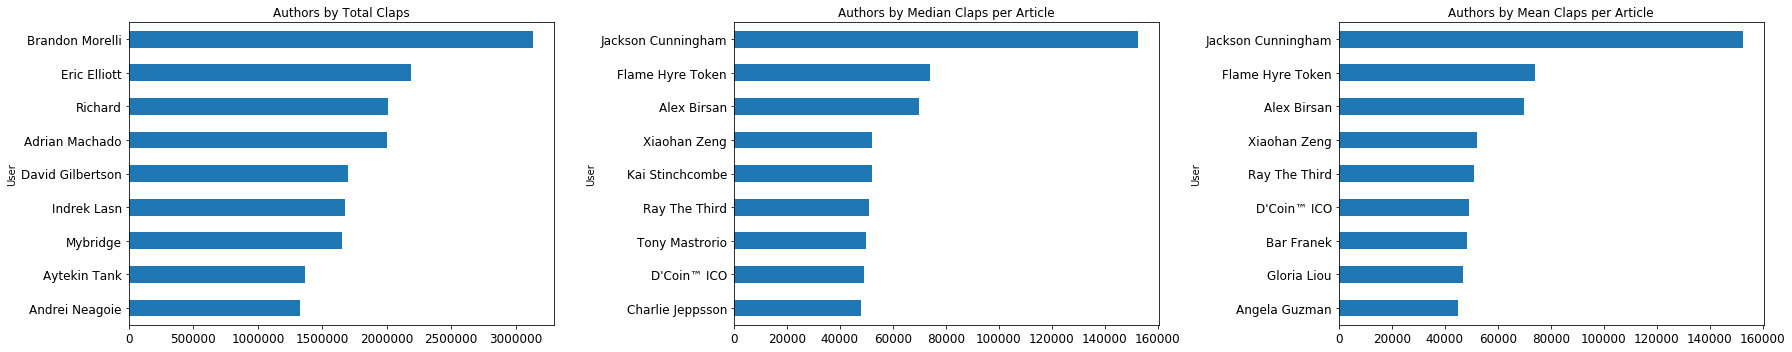

In [283]:
fig, axs = plt.subplots(1,3, figsize=(25, 5))

tagClaps = sub.groupby("User")['ClapCount_Card'].sum().sort_values()[-10:-1].plot(kind="barh", fontsize=12, ax=axs[0], title="Authors by Total Claps")

tagClaps = sub.groupby("User")['ClapCount_Card'].median().sort_values()[-10:-1].plot(kind="barh", fontsize=12, ax=axs[1], title="Authors by Median Claps per Article")

tagClaps = sub.groupby("User")['ClapCount_Card'].mean().sort_values()[-10:-1].plot(kind="barh", fontsize=12, ax=axs[2], title="Authors by Mean Claps per Article")

plt.tight_layout()

Some authors with high average claps/article are cryptocurrency ICOs (D'Coin ICO, Flame Hyre Token), probably exploited/botted claps in an attempt to gain more exposure.

Highest average clap author: https://medium.com/@jacksoncunningham wrote 2 articles, one of which was massively popular

### What is the "progression" in popularity of authors? Are the best authors the ones that write frequently?

We can track an author's "progression" by checking the number of articles / clap counts / response counts over time

### What is the tag diversity of authors? 

## Paywall dimension

The paywall refers to articles which are published by authors participating in the Medium Partner Program (MPP). These articles are under a metered paywall, meaning that a reader who is (1) not registered on Medium or (2) registered a free account but not a Medium Member (paying $5 monthly subscription), cannot read more than 5 paywalled articles per month. When crawling data, a paywalled article is indicated by a small grey star beside the story card in the archive.

An author does not have to be a Medium Member to join MPP in order to write paywalled articles. Authors under MPP are able to receive some amount of money, based on the impact of the article as measured by the time readers spend on the article, tracked internally by Medium. This data is not publicly available, but a rough approximation can be arrived at by using the "X minute read" beside each article, which is defined as such:

>Read time is based on the average reading speed of an adult (roughly 265 WPM). We take the total word count of a post and translate it into minutes, with an adjustment made for images. For posts in Chinese, Japanese and Korean, it's a function of number of characters (500 characters/min) with an adjustment made for images. [(source)](https://help.medium.com/hc/en-us/articles/214991667-Read-time)


### How many authors have written at least one paywalled article?

In [469]:
# sub = pd.read_csv("df_archive_new.csv")

,ClapCount_Card,ClapCount_Story,Company,CompanyURL,PostID,PublishedDate,ReadingTime,ResponseNum_Card,ResponseNum_Story,StoryHTML,...,Tag1,Tag2,Tag3,Tag4,Tag5,TagSource,User,UserURL,VoterCount,isPaywall
0,0,NaN,NaN,NaN,NaN,2020-05-07T14:12:44.654Z,2 min read,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,r-language,Melike ŞEN,https://medium.com/@melikesen,NaN,False
1,1,NaN,NaN,NaN,NaN,2020-05-03T15:34:53.530Z,18 min read,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,r-language,Natthapach Anuwattananon,https://medium.com/@natthapach.a,NaN,False
2,0,NaN,NaN,NaN,NaN,2020-05-07T01:17:44.964Z,4 min read,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,r-language,Saúl Buentello,https://medium.com/@cosmoduende,NaN,True
3,7,NaN,NaN,NaN,NaN,2020-03-31T14:06:19.580Z,8 min read,1 response,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,r-markdown,RB Fajriya Hakim,https://medium.com/@986110101,NaN,False
4,1,NaN,NaN,NaN,NaN,2020-03-14T18:11:44.058Z,2 min read,1 response,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,r-markdown,Kier O'Neil,https://medium.com/@kieroneil,NaN,False


763354


In [10]:
# plt.rcParams['figure.figsize'] = [8, 5]


# Number of authors that have written at least one article for a publication

# authorsListUnique = sub['User'].unique()


# display(HTML(sub[0:100].to_html()))
print(len(sub[sub['isPaywall'] == True]))
# Total percentage of articles that are paywalled
paywallPercent = len(sub[sub['isPaywall'] == True])/len(sub)
print("Paywall percentage is: ", paywallPercent)


authorPaywall = sub.groupby('User')['isPaywall'].agg(['count', 'size', 'sum']).sort_values(by="count",ascending=False).reset_index()

authorPaywall['percent_paywall'] = authorPaywall['sum']/authorPaywall['size']

authorPaywall_atleast_once = authorPaywall[authorPaywall['sum']>0]
print("Number of authors who have at least one paywall article: ", len(authorPaywall_atleast_once)/len(authorPaywall))

authorPaywall_atleast_once = authorPaywall[authorPaywall['sum']>10]



print("Median proportion of articles paywalled per author: ",authorPaywall['percent_paywall'].median())
print("Mean proportion of articles paywalled per author: ", authorPaywall['percent_paywall'].mean())
# display(HTML(authorPaywall[0:100].to_html()))

plt.rcParams['figure.figsize'] = [16, 10]


print("Median proportion of articles paywalled per author with >=1 paywall: ",authorPaywall_atleast_once['percent_paywall'].median())
print("Mean proportion of articles paywalled per author with >=1 paywall: ", authorPaywall_atleast_once['percent_paywall'].mean())
ax = authorPaywall_atleast_once['percent_paywall'].hist(bins=10)
ax.set_title("Paywall distribution of authors with > 10 paywalled articles", fontsize='22')
ax.set_ylabel("Number of authors with > 10 paywalled articles", fontsize='20')
ax.set_xlabel("Proportion of paywalled articles over total articles per author", fontsize='20')

0
Paywall percentage is:  0.0


KeyboardInterrupt: 

### What is the proportion of paywalled articles of the average author?

### Are paywalled articles skewed longer?

(0, 20)

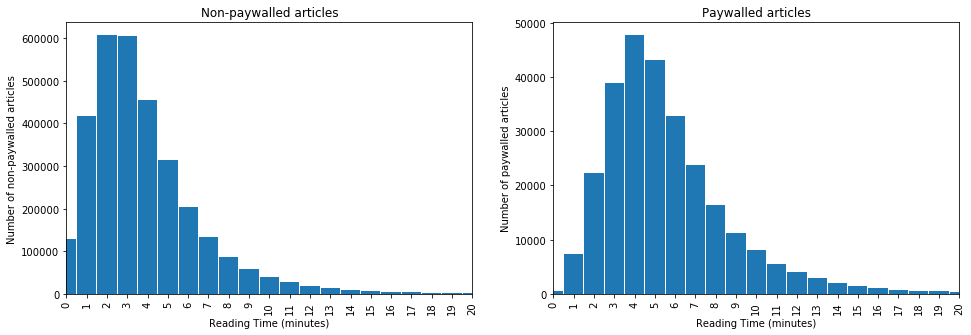

In [513]:
fig, axs = plt.subplots(1,2, figsize=(16, 5))


temp = sub[sub['isPaywall'] == False]

ax1 = temp['ReadingTime'].value_counts().sort_index().plot.bar(width=0.95,ax=axs[0])
ax1.set_xlabel("Reading Time (minutes)")
ax1.set_ylabel("Number of non-paywalled articles")
ax1.set_title("Non-paywalled articles")
ax1.set_xlim((0,20))



temp = sub[sub['isPaywall'] == True]


ax2 = temp['ReadingTime'].value_counts().sort_index().plot.bar(width=0.95, ax=axs[1])
ax2.set_xlabel("Reading Time (minutes)")
ax2.set_ylabel("Number of paywalled articles")
ax2.set_title("Paywalled articles")

ax2.set_xlim((0,20))


(0, 20)

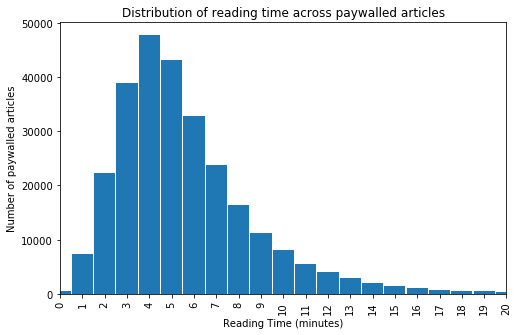

### Do paywalled articles receive more claps?

C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


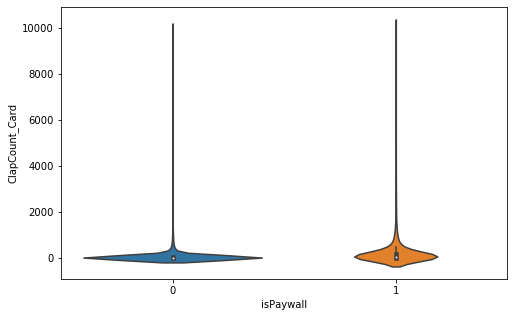

In [23]:
fig = plt.figure(figsize=(8,5))

sub = df
temp = sub
temp = temp[temp['ClapCount_Card'] < 10000]
temp['isPaywall'] = temp['isPaywall'].astype(int)
# x1 = temp.plot.scatter(x='ClapCount_Card',
#                       y='isPaywall',
#                       c='DarkBlue', s=1)

sns.violinplot('isPaywall','ClapCount_Card', data=temp,  bw=0.3)

# plt.yscale('log')

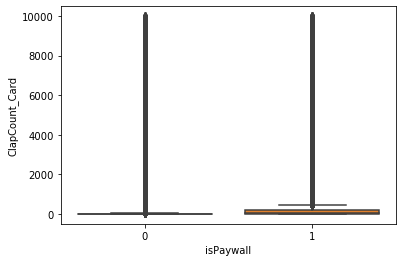

In [24]:
sns.boxplot('isPaywall','ClapCount_Card', data=temp)


### Do paywalled articles receive more responses?

### Which publications have the highest proportion of paywalled articles?

Some publications have entirely all paywalled articles. 